<a href="https://colab.research.google.com/github/0201shj/image_classification/blob/main/12_04_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://user-images.githubusercontent.com/26833433/82952157-51b7db00-9f5d-11ea-8f4b-dda1ffecf992.jpg">

This notebook was written by Ultralytics LLC, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
For more information please visit https://github.com/ultralytics/yolov5 and https://www.ultralytics.com.

In [ ]:
!ls -l

total 18180
drwxr-xr-x 3 root root     4096 Oct 14 01:44 data
-rw-r--r-- 1 root root     7511 Oct 14 01:44 detect.py
-rw-r--r-- 1 root root     1802 Oct 14 01:44 Dockerfile
-rw-r--r-- 1 root root     3460 Oct 14 01:44 hubconf.py
drwxr-xr-x 4 root root     4096 Oct 14 01:50 inference
-rw-r--r-- 1 root root    35126 Oct 14 01:44 LICENSE
drwxr-xr-x 4 root root     4096 Oct 14 01:48 models
-rwxr-xr-x 1 root root    10121 Oct 14 01:44 README.md
-rwxr-xr-x 1 root root      567 Oct 14 01:44 requirements.txt
-rw-r--r-- 1 root root    14353 Oct 14 01:44 sotabench.py
-rw-r--r-- 1 root root    13588 Oct 14 01:44 test.py
-rw-r--r-- 1 root root    27974 Oct 14 01:44 train.py
-rw-r--r-- 1 root root  3276585 Oct 14 01:44 tutorial.ipynb
drwxr-xr-x 4 root root     4096 Oct 14 01:44 utils
drwxr-xr-x 2 root root     4096 Oct 14 01:44 weights
-rw------- 1 root root 15184597 Oct 14 01:48 yolov5s.pt


# Setup

Clone repo, install dependencies, `%cd` into `./yolov5` folder and check GPU.

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -qr yolov5/requirements.txt  # install dependencies (ignore errors)
%cd yolov5

import torch
from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.7.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


# 1. Inference

Run inference with a pretrained checkpoint on contents of `/inference/images` folder. Models are auto-downloaded from [Google Drive](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J).

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%ls -l

total 520
drwxr-xr-x 4 root root   4096 Jan 12 01:30 data/
-rw-r--r-- 1 root root   8088 Jan 12 01:30 detect.py
-rw-r--r-- 1 root root   1904 Jan 12 01:30 Dockerfile
-rw-r--r-- 1 root root   5027 Jan 12 01:30 hubconf.py
-rw-r--r-- 1 root root  35126 Jan 12 01:30 LICENSE
drwxr-xr-x 3 root root   4096 Jan 12 01:30 models/
-rwxr-xr-x 1 root root  10605 Jan 12 01:30 README.md*
-rwxr-xr-x 1 root root    602 Jan 12 01:30 requirements.txt*
-rw-r--r-- 1 root root  16174 Jan 12 01:30 test.py
-rw-r--r-- 1 root root  31628 Jan 12 01:30 train.py
-rw-r--r-- 1 root root 391048 Jan 12 01:30 tutorial.ipynb
drwxr-xr-x 4 root root   4096 Jan 12 01:30 utils/
drwxr-xr-x 2 root root   4096 Jan 12 01:30 weights/


In [4]:
!pwd

/content/yolov5


In [8]:
!python detect.py --conf 0.35 --source ../20210112_104940.mp4

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.35, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='../20210112_104940.mp4', update=False, view_img=False, weights='yolov5s.pt')
YOLOv5 v4.0-10-g1d1c056 torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15079.75MB)

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients, 17.0 GFLOPS
video 1/1 (1/538) /content/20210112_104940.mp4: 384x640 1 suitcases, Done. (0.012s)
video 1/1 (2/538) /content/20210112_104940.mp4: 384x640 1 suitcases, Done. (0.013s)
video 1/1 (3/538) /content/20210112_104940.mp4: 384x640 1 suitcases, Done. (0.012s)
video 1/1 (4/538) /content/20210112_104940.mp4: 384x640 Done. (0.012s)
video 1/1 (5/538) /content/20210112_104940.mp4: 384x640 1 suitcases, Done. (0.015s)
video 1/1 (6/538) /content/20210112_104940.mp4: 384x640 Done. (0.012s)
video 1/1 (7/538) /content/20210112_104940.mp4: 384x640 Done. (0.013s)
vi

In [9]:
!python detect.py  --img 416 --conf 0.4 --source ../penguins.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='../penguins.jpg', update=False, view_img=False, weights='yolov5s.pt')
YOLOv5 v4.0-10-g1d1c056 torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15079.75MB)

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients, 17.0 GFLOPS
image 1/1 /content/penguins.jpg: 256x416 3 birds, Done. (0.011s)
Results saved to runs/detect/exp5
Done. (0.043s)


In [ ]:
!python detect.py --conf 0.35 --source ../parking.avi

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.35, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='../parking.avi', update=False, view_img=False, weights='yolov5s.pt')
Using torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15079.75MB)

Fusing layers... 
Model Summary: 232 layers, 7459581 parameters, 0 gradients, 17.5 GFLOPS
video 1/1 (1/1620) /content/parking.avi: 480x640 4 cars, Done. (0.012s)
video 1/1 (2/1620) /content/parking.avi: 480x640 5 cars, Done. (0.011s)
video 1/1 (3/1620) /content/parking.avi: 480x640 5 cars, Done. (0.011s)
video 1/1 (4/1620) /content/parking.avi: 480x640 5 cars, Done. (0.011s)
video 1/1 (5/1620) /content/parking.avi: 480x640 5 cars, Done. (0.011s)
video 1/1 (6/1620) /content/parking.avi: 480x640 5 cars, Done. (0.011s)
video 1/1 (7/1620) /content/parking.avi: 480x640 5 cars, Done. (0.011s)
video 1/1 (8/1620) /content/parking.avi: 480x640 5 cars, Done. (0.011s)
v

In [ ]:
!python detect.py --source ./20201111-1.mp4

In [ ]:
!python detect.py  --img 416 --conf 0.4 --source ../penguins.png

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='../penguins.png', update=False, view_img=False, weights='yolov5s.pt')
Using torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15079.75MB)

Fusing layers... 
Model Summary: 232 layers, 7459581 parameters, 0 gradients, 17.5 GFLOPS
image 1/1 /content/penguins.png: 288x416 6 birds, Done. (0.011s)
Results saved to runs/detect/exp7
Done. (0.076s)


In [ ]:
Image(filename='inference/images/elephant1.jpg', width=600)

In [ ]:
!python detect.py --weights 10-07-best.pt --img 416 --conf 0.4 --source inference/images/
Image(filename='inference/output/00038.jpg', width=600)

In [ ]:
Image(filename='inference/output/giraffe.jpg', width=600)

Inference can be run on a variety of sources: images, videos, directories, webcams, rtsp and http streams as shown in the example below.

In [ ]:
!python detect.py --source 'inference/images/20201009_0.mp4' --conf-thres 0.30

In [ ]:
!python detect.py --source '20201102.mp4' --conf-thres 0.3

In [ ]:
#!python detect.py --source 1

In [ ]:
!python detect.py --weights 10-10-web-best.pt --source 'inference/images/2020-10-11-web-rpa.mp4' --conf-thres 0.3

In [ ]:
# Example syntax (do not run cell)
!python detect.py --weights yolov5s.pt  --source 'inference/images/20201009_1.mp4' --conf-thres 0.3 # video

In [ ]:
!python detect.py --weights yolov5s.pt --source 'giraffe.jpg' --conf-thres 0.3

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.3, device='', img_size=640, iou_thres=0.45, save_conf=False, save_dir='inference/output', save_txt=False, source='giraffe.jpg', update=False, view_img=False, weights=['yolov5s.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Fusing layers... 
Model Summary: 140 layers, 7.45958e+06 parameters, 0 gradients
image 1/1 /content/yolov5/giraffe.jpg: 480x640 7 persons, 1 giraffes, 1 bowls, Done. (0.013s)
Results saved to inference/output
Done. (0.046s)


In [ ]:
# Example syntax (do not run cell)
!python detect.py --source file.jpg  # image 
                           file.mp4  # video
                           dir/  # directory
                           0  # webcam
                           'rtsp://170.93.143.139/rtplive/470011e600ef003a004ee33696235daa' # rtsp
                           'http://112.50.243.8/PLTV/88888888/224/3221225900/1.m3u8'  # http

# 2. Test
Test a model on COCO val or test-dev dataset to determine trained accuracy. Models are auto-downloaded from [Google Drive](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J). To show results by class use the `--verbose` flag. Note that `pycocotools` metrics may be 1-2% better than the equivalent repo metrics, as is visible below, due to slight differences in mAP computation.

### 2.1 val2017
Download COCO val 2017 dataset, 1GB, 5000 images, and test model accuracy.

In [ ]:
# Download COCO val2017
gdrive_download('1Y6Kou6kEB0ZEMCCpJSKStCor4KAReE43','coco2017val.zip')  # val2017 dataset
!mv ./coco ../  # move folder alongside /yolov5

In [ ]:
# Run YOLOv5x on COCO val2017
!python test.py --weights yolov5x.pt --data coco.yaml --img 672

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./data/coco.yaml', device='', img_size=672, iou_thres=0.65, save_conf=False, save_dir='runs/test', save_json=True, save_txt=False, single_cls=False, task='val', verbose=False, weights=['yolov5x.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

100% 170M/170M [00:04<00:00, 40.9MB/s]

Fusing layers... 
Model Summary: 284 layers, 8.89222e+07 parameters, 0 gradients
Scanning labels ../coco/labels/val2017.cache (4952 found, 0 missing, 48 empty, 0 duplicate, for 5000 images): 5000it [00:00, 16261.80it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 157/157 [02:31<00:00,  1.04it/s]
                 all       5e+03    3.63e+04       0.422       0.756       0.675       0.486
Speed: 22.3/1.7/24.1 ms inference/NMS/total per 672x672 image at batch-size 32

COCO mAP with pycocotools... saving runs/test/detections_val2017_yolov5x_results.json...
l

### 2.2 test-dev2017
Download COCO test2017 dataset, 7GB, 40,000 images, to test model accuracy on test-dev set, 20,000 images. Results are saved to a `*.json` file which can be submitted to the evaluation server at https://competitions.codalab.org/competitions/20794.

In [ ]:
# Download COCO test-dev2017
gdrive_download('1cXZR_ckHki6nddOmcysCuuJFM--T-Q6L','coco2017labels.zip')  # annotations
!f="test2017.zip" && curl http://images.cocodataset.org/zips/$f -o $f && unzip -q $f && rm $f  # 7GB,  41k images
!mv ./test2017 ./coco/images && mv ./coco ../  # move images into /coco and move /coco alongside /yolov5

In [ ]:
# Run YOLOv5s on COCO test-dev2017 with argument --task test
!python test.py --weights yolov5s.pt --data ./data/coco.yaml --task test

# 3. Train

Download https://www.kaggle.com/ultralytics/coco128, a small 128-image tutorial dataset, start tensorboard and train YOLOv5s from a pretrained checkpoint for 3 epochs (actual training is much longer, around **300-1000 epochs**, depending on your dataset).

In [ ]:
# Download coco128
gdrive_download('1n_oKgR81BJtqk75b00eAjdv03qVCQn2f','coco128.zip')  # coco128 dataset
!mv ./coco128 ../  # move folder alongside /yolov5

Train a YOLOv5s model on coco128 by specifying model config file `--cfg models/yolo5s.yaml`, and dataset config file `--data data/coco128.yaml`. Start training from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights ''`. Pretrained weights are auto-downloaded from [Google Drive](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J).

**All training results are saved to `runs/exp0`** for the first experiment, then `runs/exp1`, `runs/exp2` etc. for subsequent experiments.


In [ ]:
# Start tensorboard (optional)
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
# Train YOLOv5s on coco128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 30 --data coco128.yaml --cfg yolov5s.yaml --weights yolov5s.pt --nosave --cache

# 4. Visualize

View `runs/exp0/train*.jpg` images to see training images, labels and augmentation effects. A **Mosaic Dataloader** is used for training (shown below), a new concept developed by Ultralytics and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

In [ ]:
Image(filename='runs/exp0/train_batch1.jpg', width=900)  # view augmented training mosaics

FileNotFoundError: ignored

View `test_batch0_gt.jpg` to see test batch 0 *ground truth* labels.

In [ ]:
Image(filename='runs/exp0/test_batch0_gt.jpg', width=900)  # view test image labels

View `test_batch0_pred.jpg` to see test batch 0 *predictions*.

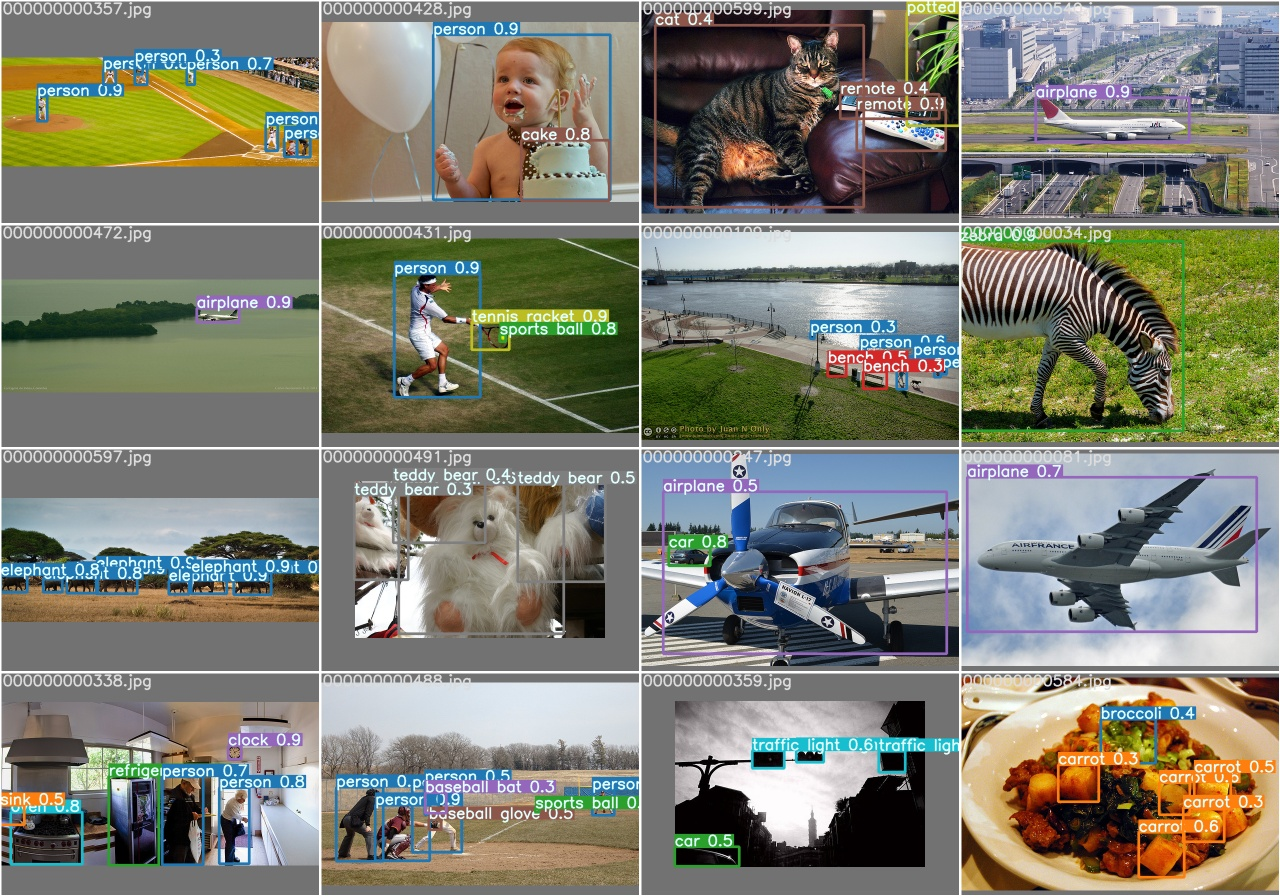

In [ ]:
Image(filename='runs/exp0/test_batch0_pred.jpg', width=900)  # view test image predictions

Training losses and performance metrics are saved to Tensorboard and also to a `runs/exp0/results.txt` logfile. `results.txt` is plotted as `results.png` after training completes. Partially completed `results.txt` files can be plotted with `from utils.general import plot_results; plot_results()`. Here we show YOLOv5s trained on coco128 to 300 epochs, starting from scratch (blue), and from pretrained `yolov5s.pt` (orange).

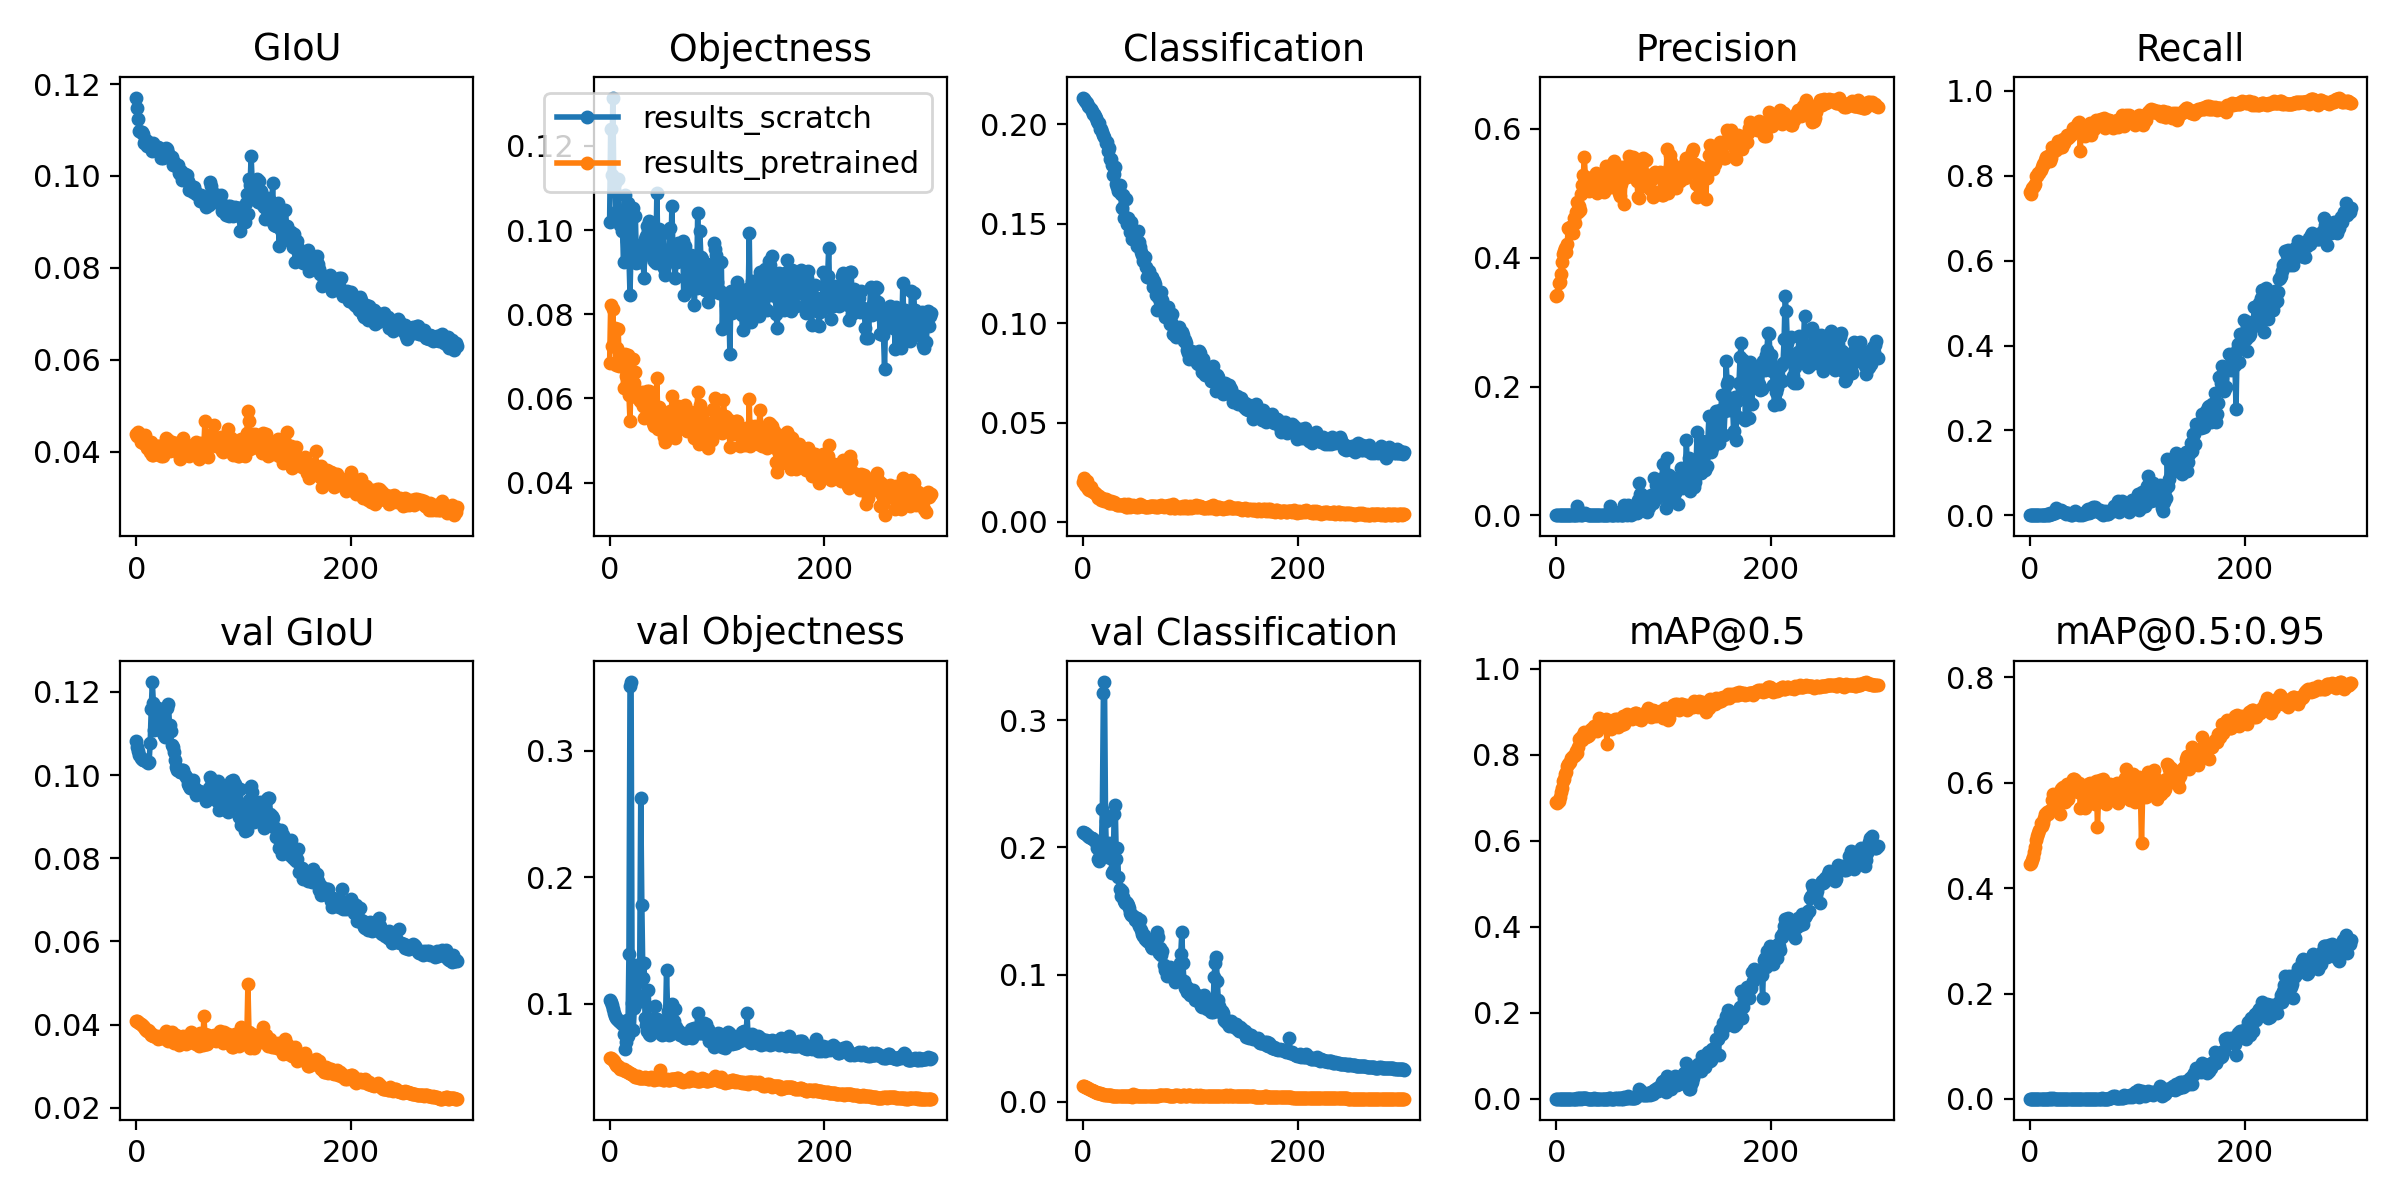

In [ ]:
from utils.general import plot_results; plot_results()  # plot results.txt files as results.png

# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including CUDA/CUDNN, Python and PyTorch preinstalled):

- **Google Colab Notebook** with free GPU: <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
- **Kaggle Notebook** with free GPU: [https://www.kaggle.com/ultralytics/yolov5](https://www.kaggle.com/ultralytics/yolov5)
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/GCP-Quickstart) 
- **Docker Image** https://hub.docker.com/r/ultralytics/yolov5. See [Docker Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/Docker-Quickstart) ![Docker Pulls](https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker)

# Appendix

Optional extras below. Unit tests validate repo functionality and should be run on any PRs submitted.


In [ ]:
# Re-clone repo
%cd ..
!rm -rf yolov5 && git clone https://github.com/ultralytics/yolov5
%cd yolov5

In [ ]:
# Test GCP ckpt
%%shell
for x in best*
do
  gsutil cp gs://*/*/*/$x.pt .
  python test.py --weights $x.pt --data coco.yaml --img 672
done

In [ ]:
# YOLOv5 unit tests
%%shell
cd .. && rm -rf yolov5 && git clone https://github.com/ultralytics/yolov5 && cd yolov5
export PYTHONPATH="$PWD" # to run *.py. files in subdirectories
pip install -qr requirements.txt onnx
python3 -c "from utils.google_utils import *; gdrive_download('1n_oKgR81BJtqk75b00eAjdv03qVCQn2f', 'coco128.zip')" && mv ./coco128 ../
for x in yolov5s #yolov5m yolov5l yolov5x # models
do
  python train.py --weights $x.pt --cfg $x.yaml --epochs 4 --img 320 --device 0  # train
  for di in 0 cpu # inference devices
  do
    python detect.py --weights $x.pt --device $di  # detect official
    python detect.py --weights runs/exp0/weights/last.pt --device $di  # detect custom
    python test.py --weights $x.pt --device $di # test official
    python test.py --weights runs/exp0/weights/last.pt --device $di # test custom
  done
  python models/yolo.py --cfg $x.yaml # inspect
  python models/export.py --weights $x.pt --img 640 --batch 1 # export
done